# UK Train Rides Analysis

This notebook demonstrates the process of generating and analyzing mock train ticket data for the National Rail in the UK, covering journeys from January to April 2024. The data includes various details about each journey, such as the type of ticket, departure & arrival stations, ticket prices, and journey status.

### Data Generation

The dataset consists of the following fields:
- **Transaction ID**: Unique identifier for each ticket purchase.
- **Date of Purchase**: The date the ticket was bought.
- **Time of Purchase**: The exact time the ticket was purchased.
- **Purchase Type**: Whether the ticket was bought online or at the station.
- **Payment Method**: Method used for payment (e.g., Credit Card, Contactless).
- **Railcard**: Type of railcard used (e.g., Adult, Senior, Disabled).
- **Ticket Class**: Class of the ticket (e.g., Standard, First Class).
- **Ticket Type**: Type of the ticket (e.g., Advance, Anytime).
- **Price**: The price of the ticket.
- **Departure Station**: The station where the journey starts.
- **Arrival Station**: The station where the journey ends.
- **Date of Journey**: The date of the journey.
- **Departure Time**: The scheduled departure time.
- **Arrival Time**: The scheduled arrival time.
- **Actual Arrival Time**: The actual arrival time (used to calculate delays).
- **Journey Status**: Status of the journey (e.g., On Time, Delayed).
- **Reason for Delay**: If the journey was delayed, this field describes the reason (e.g., Signal Failure, Weather).
- **Refund Request**: Whether a refund was requested (Yes/No).

### Analysis

1. **Most Popular Routes**: We group the data by departure and arrival stations, counting the occurrences of each route to identify the most frequently traveled routes.
2. **Peak Travel Times**: By analyzing the `Departure Time`, we identify peak hours for train travel.
3. **Revenue Variation by Ticket Types and Classes**: We calculate the total revenue by grouping the data by `Ticket Type` and `Ticket Class` and summing the `Price` for each category.
4. **On-Time Performance (OTP)**: The On-Time Performance is calculated as the percentage of journeys marked as "On Time". We also calculate the average delay time for delayed journeys and group the delays by reason.

And Many more

The dataset allows for insight into the operational performance of train journeys, including factors like ticket sales, popular routes, peak travel times, and delay reasons.


## Import Libararies and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv(r"D:\Maven Analytics\UK_Train_Rides\railway.csv")

## Exploratory Data Analysis (EDA)

In [3]:
print("Dataset Preview:")
data.head()

Dataset Preview:


,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [4]:
data.shape

(31653, 18)

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard                   0
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64


In [6]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
              Price
count  31653.000000
mean      23.439200
std       29.997628
min        1.000000
25%        5.000000
50%       11.000000
75%       35.000000
max      267.000000


In [7]:
data.columns

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request'],
      dtype='object')

## Data Cleaning

In [8]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], errors='coerce')
data['Date of Journey'] = pd.to_datetime(data['Date of Journey'], errors='coerce')
data['Time of Purchase'] = pd.to_datetime(data['Time of Purchase'], format='%H:%M:%S', errors='coerce')
data['Departure Time'] = pd.to_datetime(data['Departure Time'], format='%H:%M:%S', errors='coerce')
data['Arrival Time'] = pd.to_datetime(data['Arrival Time'], format='%H:%M:%S', errors='coerce')
data['Actual Arrival Time'] = pd.to_datetime(data['Actual Arrival Time'], format='%H:%M:%S', errors='coerce')

In [9]:
data['Reason for Delay'] = data['Reason for Delay'].fillna('No delay')
data['Reason for Delay'] = data['Reason for Delay'].replace('Signal failure', 'Signal Failure')

In [10]:
categorical_columns = ['Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class', 'Ticket Type', 'Journey Status', 'Refund Request']
for col in categorical_columns:
    data[col] = data[col].astype('category')


## Data Visualization and Analysis

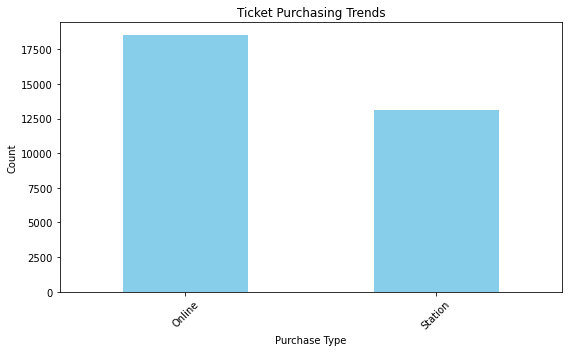

In [11]:
# Purchase Type
purchase_trends = data['Purchase Type'].value_counts()
plt.figure(figsize=(8, 5))
purchase_trends.plot(kind='bar', color='skyblue')
plt.title('Ticket Purchasing Trends')
plt.xlabel('Purchase Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

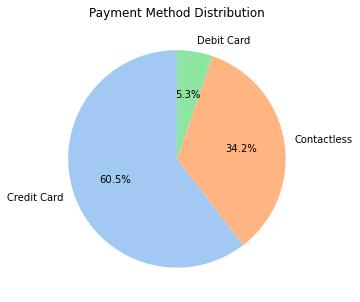

In [12]:
# Payment Methods
payment_methods = data['Payment Method'].value_counts()
plt.figure(figsize=(8, 5))
payment_methods.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

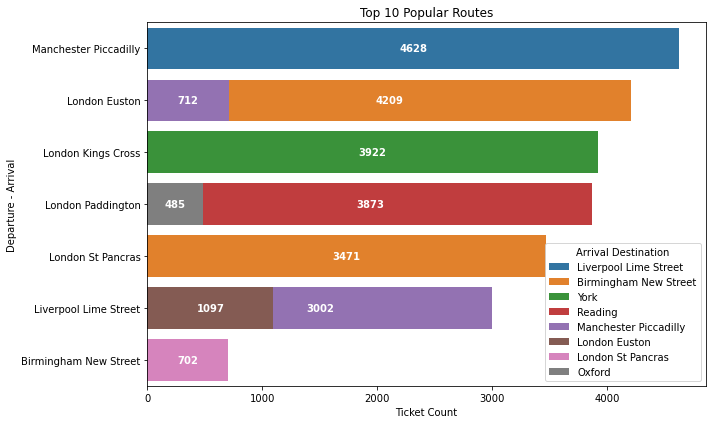

In [13]:
# Popular Routes
# Calculate popular routes
popular_routes = data.groupby(['Departure Station', 'Arrival Destination']).size().reset_index(name='Count')
popular_routes = popular_routes.sort_values('Count', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=popular_routes, x='Count', y='Departure Station', hue='Arrival Destination', dodge=False)

# Add annotations to the bars (values in the middle)
for container in bar_plot.containers:
    for bar in container:
        bar_width = bar.get_width()
        bar_height = bar.get_height()
        if not pd.isna(bar_width):  # Skip NaN values
            plt.text(bar_width / 2, bar.get_y() + bar_height / 2,
                     f'{int(bar_width)}',  # Display the count
                     va='center', ha='center', color='white', weight='bold')

# Customize plot
plt.title('Top 10 Popular Routes')
plt.xlabel('Ticket Count')
plt.ylabel('Departure - Arrival')
plt.tight_layout()
plt.show()



In [14]:
# Filter out rows where 'Reason for Delay' is 'Unknown' or blank
delayed_data_filtered = data[(data['Journey Status'] == 'Delayed') & 
                              ~data['Reason for Delay'].isin(['Unknown', ''])]

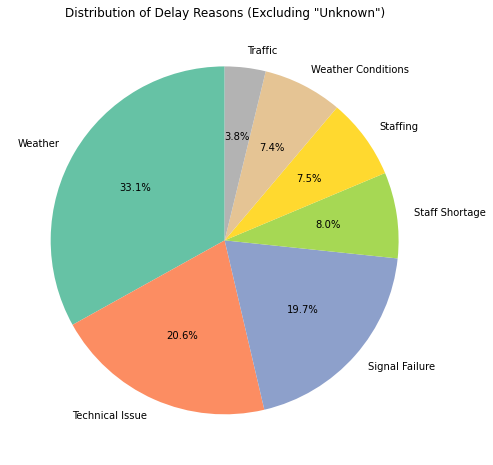

In [15]:
# Plot reasons for delays as a pie chart
plt.figure(figsize=(8, 8))
reason_counts = delayed_data_filtered['Reason for Delay'].value_counts()
reason_counts.plot.pie(autopct='%1.1f%%', startangle=90, legend=False, cmap='Set2')
plt.title('Distribution of Delay Reasons (Excluding "Unknown")')
plt.ylabel('')
plt.show()

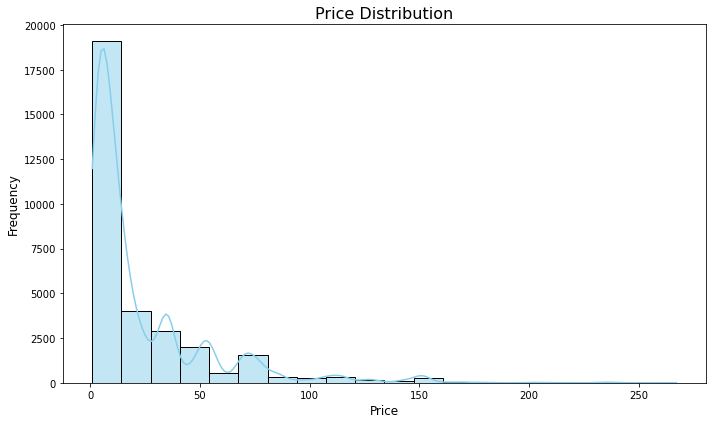

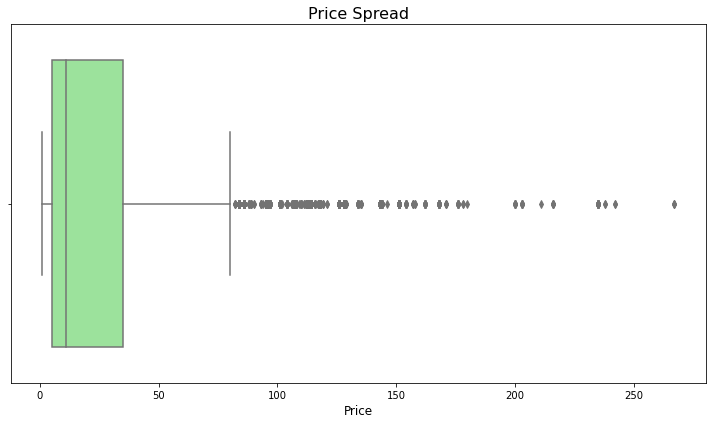

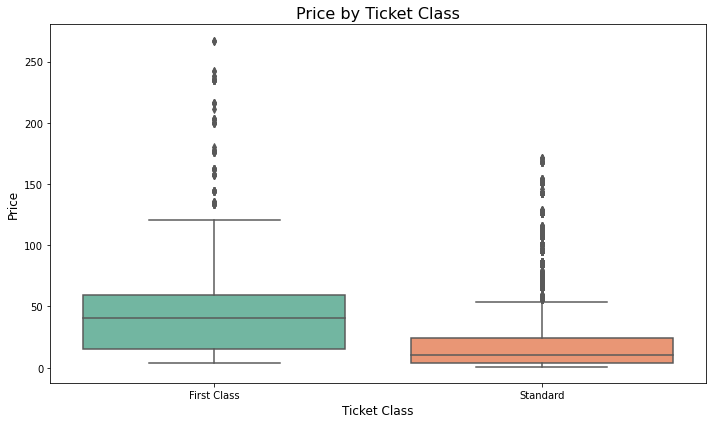

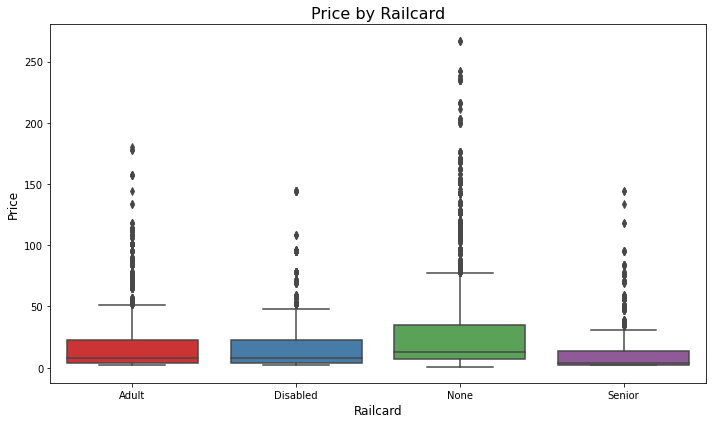

In [16]:

# 1. Histogram to show the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, color='skyblue', bins=20)
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Box Plot to show the spread of prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Price', color='lightgreen')
plt.title('Price Spread', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Price by Ticket Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Ticket Class', y='Price', palette="Set2")
plt.title('Price by Ticket Class', fontsize=16)
plt.xlabel('Ticket Class', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Price by Railcard
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Railcard', y='Price', palette="Set1")
plt.title('Price by Railcard', fontsize=16)
plt.xlabel('Railcard', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.show()


In [17]:
# Route with max delays

# Count the number of delays for each route (Departure Station to Arrival Destination)
route_delays = delayed_data_filtered.groupby(['Departure Station', 'Arrival Destination']).size().reset_index(name='Delay Count')

# Find the route with the most delays
max_delayed_route = route_delays.loc[route_delays['Delay Count'].idxmax()]

# Filter for rows that match the route with the most delays
max_delayed_route_data = delayed_data_filtered[
    (delayed_data_filtered['Departure Station'] == max_delayed_route['Departure Station']) & 
    (delayed_data_filtered['Arrival Destination'] == max_delayed_route['Arrival Destination'])
]

# Count the occurrences of each reason for delay for this route
delay_reason_counts = max_delayed_route_data['Reason for Delay'].value_counts()

# Print the route with the most delays and the delay reason counts
print("Route with the most delays:")
print(f"Route: {max_delayed_route['Departure Station']} -> {max_delayed_route['Arrival Destination']}")
print(f"Number of Delays: {max_delayed_route['Delay Count']}")
print("\nDelay Reasons for this Route:")
print(delay_reason_counts)


Route with the most delays:
Route: Liverpool Lime Street -> London Euston
Number of Delays: 780

Delay Reasons for this Route:
Weather               499
Technical Issue       139
Staffing               45
Traffic                40
Weather Conditions     29
Signal Failure         24
Staff Shortage          4
Name: Reason for Delay, dtype: int64


In [18]:
# Filter data for 'On Time' journeys
on_time_data = data[data['Journey Status'] == 'On Time']

# Combine departure and arrival stations to define unique routes
on_time_data['Route'] = on_time_data['Departure Station'] + " -> " + on_time_data['Arrival Destination']

# Identify all unique routes in the dataset
all_routes = data['Departure Station'] + " -> " + data['Arrival Destination']
unique_routes = all_routes.unique()

# Identify routes with delays
delayed_routes = delayed_data_filtered['Departure Station'] + " -> " + delayed_data_filtered['Arrival Destination']

# Find routes with zero delays by excluding delayed routes
routes_with_zero_delays = set(unique_routes) - set(delayed_routes)

# Display routes with zero delays
print("Routes with zero delays:")
for route in routes_with_zero_delays:
    print(route)


Routes with zero delays:
Reading -> Didcot
Liverpool Lime Street -> London St Pancras
Birmingham New Street -> Coventry
London Paddington -> Manchester Piccadilly
London Paddington -> Oxford
London St Pancras -> Birmingham New Street
Liverpool Lime Street -> Leeds
Birmingham New Street -> Wolverhampton
York -> Liverpool Lime Street
Birmingham New Street -> London St Pancras
Bristol Temple Meads -> Cardiff Central
Birmingham New Street -> Reading
Manchester Piccadilly -> London Paddington
York -> Leeds
York -> Edinburgh Waverley
Birmingham New Street -> Nuneaton
Birmingham New Street -> London Kings Cross
Manchester Piccadilly -> York
Birmingham New Street -> Edinburgh
Reading -> Swindon
Manchester Piccadilly -> London Kings Cross
Birmingham New Street -> Tamworth
London St Pancras -> Leicester
York -> Birmingham New Street
Birmingham New Street -> York
Manchester Piccadilly -> Sheffield
Birmingham New Street -> Liverpool Lime Street
London Euston -> Oxford
London St Pancras -> Wolverha

In [19]:

# Ensure time columns are in datetime format
data['Arrival Time'] = pd.to_datetime(data['Arrival Time'])
data['Actual Arrival Time'] = pd.to_datetime(data['Actual Arrival Time'])

# Calculate delay in minutes
data['Delay (Minutes)'] = (data['Actual Arrival Time'] - data['Arrival Time']).dt.total_seconds() / 60

# Filter only delayed journeys
delayed_data = data[data['Delay (Minutes)'] > 0]

# Function to format delay in hours and minutes
def format_delay(minutes):
    hours = int(minutes // 60)
    remaining_minutes = int(minutes % 60)
    if hours > 0:
        if remaining_minutes > 0:
            return f"{hours} hour{'s' if hours > 1 else ''} and {remaining_minutes} minute{'s' if remaining_minutes > 1 else ''}"
        return f"{hours} hour{'s' if hours > 1 else ''}"
    return f"{remaining_minutes} minute{'s' if remaining_minutes > 1 else ''}"

# Apply the formatting function to the 'Delay (Minutes)' column
delayed_data['Formatted Delay'] = delayed_data['Delay (Minutes)'].apply(format_delay)

# Find the route with the maximum delay
max_delayed_route = delayed_data.loc[delayed_data['Delay (Minutes)'].idxmax()]

# Display the result including the reason for delay
print(f"Route with Maximum Delay: {max_delayed_route['Departure Station']} -> {max_delayed_route['Arrival Destination']}")
print(f"Maximum Delay: {max_delayed_route['Formatted Delay']}")
print(f"Reason for Delay: {max_delayed_route['Reason for Delay']}")
print(f"Date : {max_delayed_route['Date of Journey']}")


Route with Maximum Delay: Manchester Piccadilly -> Leeds
Maximum Delay: 3 hours
Reason for Delay: Signal Failure
Date : 2024-01-12 00:00:00


In [20]:

# Calculate delay in minutes
data['Delay (Minutes)'] = (data['Actual Arrival Time'] - data['Arrival Time']).dt.total_seconds() / 60

# Filter only delayed journeys
delayed_data = data[data['Delay (Minutes)'] > 0]

# Calculate the average delay
average_delay = delayed_data['Delay (Minutes)'].mean()

# Function to format delay in hours and minutes
def format_delay(minutes):
    hours = int(minutes // 60)
    remaining_minutes = int(minutes % 60)
    if hours > 0:
        if remaining_minutes > 0:
            return f"{hours} hour{'s' if hours > 1 else ''} and {remaining_minutes} minute{'s' if remaining_minutes > 1 else ''}"
        return f"{hours} hour{'s' if hours > 1 else ''}"
    return f"{remaining_minutes} minute{'s' if remaining_minutes > 1 else ''}"

# Format the average delay
formatted_average_delay = format_delay(average_delay)

# Display the result
print(f"Average Delay: {formatted_average_delay}")


Average Delay: 42 minutes


In [21]:
delayed_data['Formatted Delay'] = delayed_data['Delay (Minutes)'].apply(format_delay)

# Find the route with the maximum delay
min_delayed_route = delayed_data.loc[delayed_data['Delay (Minutes)'].idxmin()]

# Display the result
print(f"Route with Minimum Delay: {min_delayed_route['Departure Station']} -> {min_delayed_route['Arrival Destination']}")
print(f"Minimum Delay: {min_delayed_route['Formatted Delay']}")
print(f"Reason for Delay: {min_delayed_route['Reason for Delay']}")
print(f"Date : {min_delayed_route['Date of Journey']}")


Route with Minimum Delay: Liverpool Lime Street -> Manchester Piccadilly
Minimum Delay: 1 minute
Reason for Delay: Technical Issue
Date : 2024-01-18 00:00:00


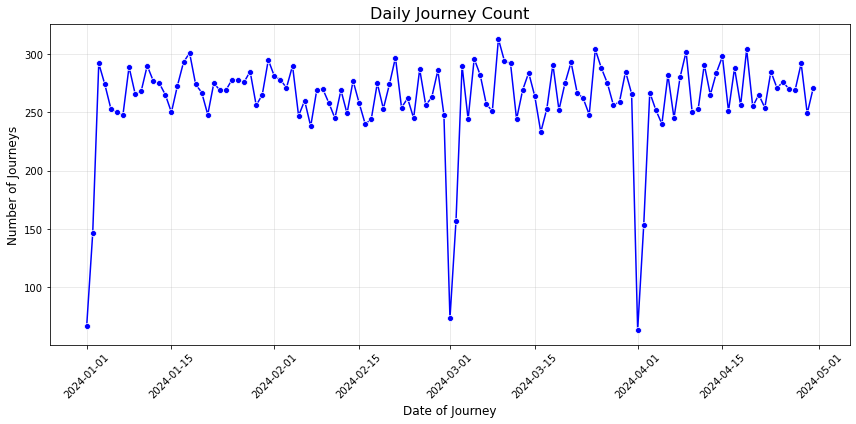

In [22]:
# Calculate daily journey count
daily_journey_count = data.groupby('Date of Journey').size().reset_index(name='Journey Count')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_journey_count, x='Date of Journey', y='Journey Count', marker='o', color='b')

# Customize the plot
plt.title('Daily Journey Count', fontsize=16)
plt.xlabel('Date of Journey', fontsize=12)
plt.ylabel('Number of Journeys', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the plot
plt.show()


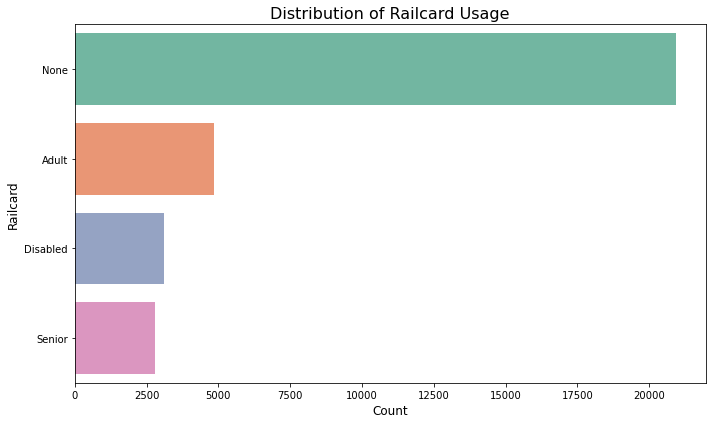

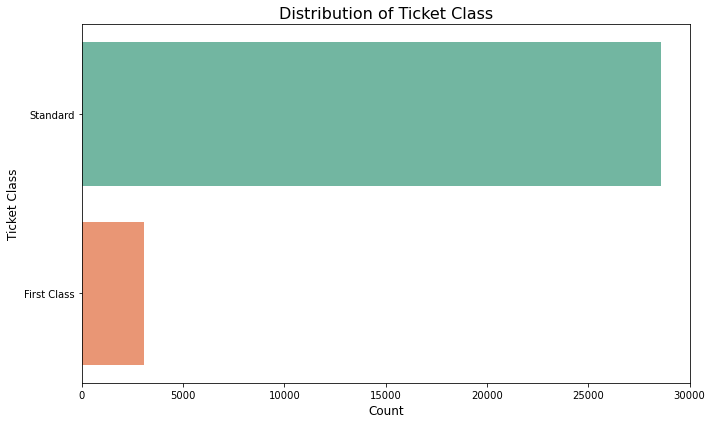

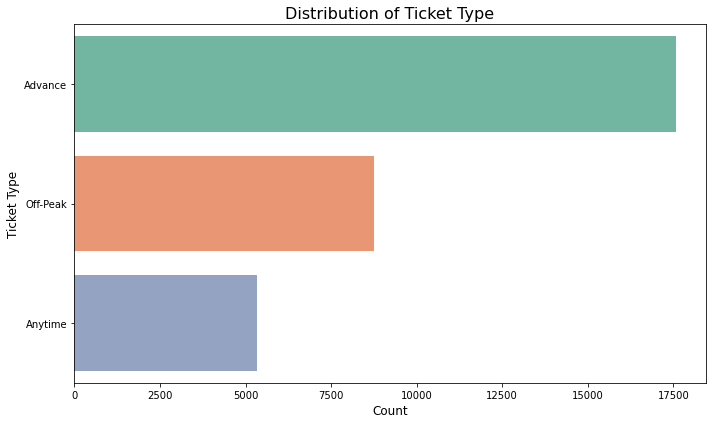

In [23]:
# Define a function to create bar plots
def plot_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, y=column, order=data[column].value_counts().index, palette="Set2")
    plt.title(title, fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot for Railcard
plot_distribution(data, 'Railcard', 'Distribution of Railcard Usage')

# Plot for Ticket Class
plot_distribution(data, 'Ticket Class', 'Distribution of Ticket Class')

# Plot for Ticket Type
plot_distribution(data, 'Ticket Type', 'Distribution of Ticket Type')


In [24]:
# Group data by 'Departure Station' and 'Arrival Destination' and sum the prices for each route
route_earnings = data.groupby(['Departure Station', 'Arrival Destination'])['Price'].sum().reset_index()

# Find the route with maximum earnings
max_earning_route = route_earnings.loc[route_earnings['Price'].idxmax()]

# Find the route with minimum earnings
min_earning_route = route_earnings.loc[route_earnings['Price'].idxmin()]

# Display the results
print(f"Route with Maximum Earnings: {max_earning_route['Departure Station']} -> {max_earning_route['Arrival Destination']}")
print(f"Maximum Earnings: £{max_earning_route['Price']:.2f}")

print(f"Route with Minimum Earnings: {min_earning_route['Departure Station']} -> {min_earning_route['Arrival Destination']}")
print(f"Minimum Earnings: £{min_earning_route['Price']:.2f}")


Route with Maximum Earnings: London Kings Cross -> York
Maximum Earnings: £183193.00
Route with Minimum Earnings: London Euston -> Oxford
Minimum Earnings: £41.00


In [25]:
# Ensure 'Date of Journey' is in datetime format

# Group data by 'Date of Journey' and sum the 'Price' for each date
daily_earnings = data.groupby('Date of Journey')['Price'].sum().reset_index()

# Find the date with maximum earnings
max_earning_date = daily_earnings.loc[daily_earnings['Price'].idxmax()]

# Find the date with minimum earnings
min_earning_date = daily_earnings.loc[daily_earnings['Price'].idxmin()]

# Display the results
print(f"Date with Maximum Earnings: {max_earning_date['Date of Journey'].strftime('%d-%m-%Y')}")
print(f"Maximum Earnings: £{max_earning_date['Price']:.2f}")

print(f"Date with Minimum Earnings: {min_earning_date['Date of Journey'].strftime('%d-%m-%Y')}")
print(f"Minimum Earnings: £{min_earning_date['Price']:.2f}")


Date with Maximum Earnings: 31-01-2024
Maximum Earnings: £9196.00
Date with Minimum Earnings: 01-04-2024
Minimum Earnings: £1562.00


In [26]:
# Calculate the difference between 'Date of Journey' and 'Date of Purchase'
data['Days Between'] = (data['Date of Journey'] - data['Date of Purchase']).dt.days

# Get the maximum and minimum gap in days
max_gap = data['Days Between'].max()
min_gap = data['Days Between'].min()

# Count tickets where 'Days Between' is 0 (purchased on the same day) and greater than 0
same_day_count = data[data['Days Between'] == 0].shape[0]
greater_than_zero_count = data[data['Days Between'] > 0].shape[0]

# Print the results
print(f"Maximum Gap: {max_gap} days")
print(f"Minimum Gap: {min_gap} days")
print(f"Tickets Purchased on the Same Day: {same_day_count}")
print(f"Tickets Purchased before Journey Day {greater_than_zero_count}")


Maximum Gap: 28 days
Minimum Gap: 0 days
Tickets Purchased on the Same Day: 14092
Tickets Purchased before Journey Day 17561


In [28]:
# Ensure delay time is calculated first
data['Delay (Minutes)'] = (pd.to_datetime(data['Actual Arrival Time']) - pd.to_datetime(data['Arrival Time'])).dt.total_seconds() / 60

# Calculate On-Time Performance (OTP)
total_journeys = len(data)
on_time_journeys = len(data[data['Journey Status'] == 'On Time'])
otp = (on_time_journeys / total_journeys) * 100

# Identify the main contributing factors for delays and calculate average delay time
delay_reasons = data.groupby('Reason for Delay').agg(
    delay_count=('Reason for Delay', 'size'),
    avg_delay=('Delay (Minutes)', lambda x: round(x.mean()))
).sort_values(by='delay_count', ascending=False)

# Display OTP and contributing factors with average delay time (rounded)
print(f"On-Time Performance (OTP): {otp:.2f}%")
print("\nMain Contributing Factors to Delays with Average Delay Time (rounded to nearest minute):")
print(delay_reasons)

On-Time Performance (OTP): 86.82%

Main Contributing Factors to Delays with Average Delay Time (rounded to nearest minute):
                    delay_count  avg_delay
Reason for Delay                          
No delay                  27481          0
Weather                     995         47
Signal Failure              970         52
Technical Issue             707         25
Staffing                    410         26
Staff Shortage              399         75
Weather Conditions          377         31
Traffic                     314         32


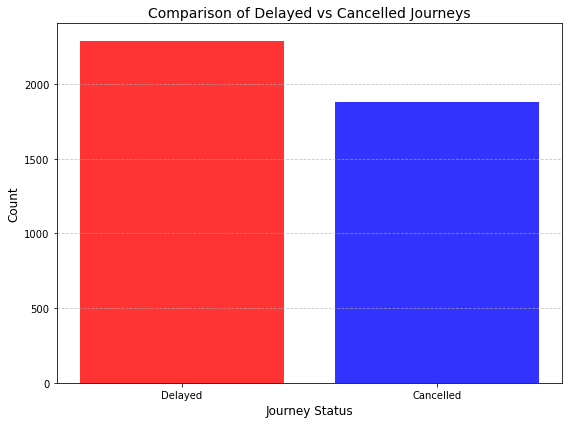

In [31]:
status_counts = data['Journey Status'].value_counts()
delayed_count = status_counts.get('Delayed', 0)
canceled_count = status_counts.get('Cancelled', 0)  # If 'Cancelled' is a possible status
on_time_count = status_counts.get('On Time', 0)

# Create a comparison for delayed vs canceled
comparison_data = {'Delayed': delayed_count, 'Cancelled': canceled_count}

# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(comparison_data.keys(), comparison_data.values(), color=['red', 'blue'], alpha=0.8)
plt.title('Comparison of Delayed vs Cancelled Journeys', fontsize=14)
plt.xlabel('Journey Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()